In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
sns.set()
sales_df = pd.read_csv('/sales_data.csv')
costumer_df = pd.read_csv('/customer_info.csv')
product_df = pd.read_csv('/product_info.csv')
print("sales_df shape:" , sales_df.shape)
print("costumer_df shape:" , costumer_df.shape)
print("product_df shape:" , product_df.shape)
sales_df.head()
def check_table(df, name):
 print(f"\n================{name}================")
 display(df.head(5))
 print("\nInfo (types + non-missing counts): ")
 df.info()
 print("\nMissing value per column: ")
 display(df.isnull().sum().sort_values(ascending=False))
 print("\nNumber of duplicate rows:")
 print(df.duplicated().sum())
check_table(sales_df, "sales_df")
check_table(costumer_df, "costumer_df")
check_table(product_df, "product_df")

sales_df shape: (3000, 10)
costumer_df shape: (500, 6)
product_df shape: (30, 6)

================sales_df================


,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
0,O966977,C00397,P0022,3,39.25,06-07-2025,Delivered,PayPal,Central,0.00
1,O696648,C00236,P0023,5,18.92,06-07-2025,DELAYED,credit card,North,0.00
2,O202644,C00492,P0011,1,29.68,07-07-2025,delivered,Bank Transfer,North,0.15
3,O501803,C00031,P0003,1,32.76,08-07-2025,Cancelled,Credit Card,Central,0.20
4,O322242,C00495,P0016,1,47.62,08-07-2025,DELAYED,Credit Card,West,0.20



Info (types + non-missing counts): 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          2999 non-null   object 
 1   customer_id       2998 non-null   object 
 2   product_id        2995 non-null   object 
 3   quantity          2997 non-null   object 
 4   unit_price        2999 non-null   float64
 5   order_date        2998 non-null   object 
 6   delivery_status   2997 non-null   object 
 7   payment_method    2997 non-null   object 
 8   region            3000 non-null   object 
 9   discount_applied  2483 non-null   float64
dtypes: float64(2), object(8)
memory usage: 234.5+ KB

Missing value per column: 


,0
discount_applied,517
product_id,5
payment_method,3
quantity,3
delivery_status,3
customer_id,2
order_date,2
order_id,1
unit_price,1
region,0



Number of duplicate rows:
0

================costumer_df================


,customer_id,email,signup_date,gender,region,loyalty_tier
0,C00001,shaneramirez@gmail.com,26-04-25,Male,Central,Silver
1,C00002,jpeterson@bernard.com,11-08-24,Female,Central,gold
2,C00003,howardmaurice@yahoo.com,15-05-25,male,Central,gold
3,C00004,yherrera@arnold.org,14-06-25,FEMALE,Central,GOLD
4,C00005,janetwilliams@gmail.com,02-05-25,Male,West,bronze



Info (types + non-missing counts): 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   497 non-null    object
 1   email         494 non-null    object
 2   signup_date   496 non-null    object
 3   gender        496 non-null    object
 4   region        497 non-null    object
 5   loyalty_tier  498 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB

Missing value per column: 


,0
email,6
signup_date,4
gender,4
customer_id,3
region,3
loyalty_tier,2



Number of duplicate rows:
0

================product_df================


,product_id,product_name,category,launch_date,base_price,supplier_code
0,P0001,Storage Product 39,Storage,11-03-25,15.88,S339
1,P0002,Cleaning Product 82,Cleaning,18-08-24,34.23,S974
2,P0003,Cleaning Product 85,Cleaning,15-07-24,7.92,S745
3,P0004,Kitchen Product 82,Kitchen,19-04-25,9.13,S589
4,P0005,Personal Care Product 1,Personal Care,20-10-24,31.10,S559



Info (types + non-missing counts): 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     30 non-null     object 
 1   product_name   30 non-null     object 
 2   category       30 non-null     object 
 3   launch_date    30 non-null     object 
 4   base_price     30 non-null     float64
 5   supplier_code  30 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.5+ KB

Missing value per column: 


,0
product_id,0
product_name,0
category,0
launch_date,0
base_price,0
supplier_code,0



Number of duplicate rows:
0


# New section

In [ ]:
#clean_sale_df
sales = sales_df.copy()
for col in ["delivery_status", "payment_method", "region"]:
 if col in sales.columns:
  sales[col] = sales[col].astype(str).str.strip()
if "delivery_status" in sales.columns:
 sales["delivery_status"] = sales["delivery_status"].str.lower().str.title()
for col in ["payment_method", "region"]:
  if col in sales.columns:
   sales[col] = sales[col].str.lower().str.title()
if "order_date" in sales.columns:
  sales["order_date"] = pd.to_datetime(sales["order_date"], errors = "coerce")
if "discount_applied" in sales.columns:
  sales["discount_applied"] = pd.to_numeric(sales["discount_applied"], errors = "coerce")
  sales["discount_applied"] = sales["discount_applied"].fillna(0.0)
for col in ["quantity" , "unit_price"]:
  if col in sales.columns:
   sales[col] = pd.to_numeric(sales[col], errors = "coerce")
if "order_id" in sales.columns:
  before = len(sales)
  sales = sales.drop_duplicates(subset = ["order_id"])
  print(f"Duplicates removed: {before - len(sales)}")
invalid_mask = False
for col in ["quantity", "unit_price", "discount_applied"]:
            if col in sales.columns:
                invalid_mask = invalid_mask | (sales[col] <= 0)
invalid_count = invalid_mask.sum() if hasattr(invalid_mask, "sum") else 0
print("Invalid rows (negative numbers):", invalid_count)
sales.head()


Duplicates removed: 2
Invalid rows (negative numbers): 996


,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
0,O966977,C00397,P0022,3.0,39.25,2025-06-07,Delivered,Paypal,Central,0.00
1,O696648,C00236,P0023,5.0,18.92,2025-06-07,Delayed,Credit Card,North,0.00
2,O202644,C00492,P0011,1.0,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15
3,O501803,C00031,P0003,1.0,32.76,2025-08-07,Cancelled,Credit Card,Central,0.20
4,O322242,C00495,P0016,1.0,47.62,2025-08-07,Delayed,Credit Card,West,0.20


# New section

In [ ]:
#clean_product_df
products = product_df.copy()

# Text: trim and standardise category format
for col in ["product_name", "category", "supplier_code"]:
    if col in products.columns:
        products[col] = products[col].astype(str).str.strip()

if "category" in products.columns:
    products["category"] = products["category"].replace({"nan": np.nan, "Nan": np.nan})
    products["category"] = products["category"].fillna("Unknown")
    products["category"] = products["category"].str.lower().str.title()

# Dates
if "launch_date" in products.columns:
    products["launch_date"] = pd.to_datetime(products["launch_date"], errors="coerce")

# Numeric
if "base_price" in products.columns:
    products["base_price"] = pd.to_numeric(products["base_price"], errors="coerce")

# Remove duplicates by product_id
if "product_id" in products.columns:
    before = len(products)
    products = products.drop_duplicates(subset=["product_id"])
    print("Removed duplicate product_id rows:", before - len(products))

products.head()


Removed duplicate product_id rows: 0


/tmp/ipython-input-3051859126.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  products["launch_date"] = pd.to_datetime(products["launch_date"], errors="coerce")


,product_id,product_name,category,launch_date,base_price,supplier_code
0,P0001,Storage Product 39,Storage,2025-11-03,15.88,S339
1,P0002,Cleaning Product 82,Cleaning,2024-08-18,34.23,S974
2,P0003,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745
3,P0004,Kitchen Product 82,Kitchen,2025-04-19,9.13,S589
4,P0005,Personal Care Product 1,Personal Care,2024-10-20,31.10,S559


# New section

In [ ]:
#clean_customer
customer_df = costumer_df.copy()
customers = customer_df.copy()
# Text: trim and standardise region and loyalty_tier
for col in ["email", "gender", "region", "loyalty_tier"]:
    if col in customers.columns:
        customers[col] = customers[col].astype(str).str.strip()

if "region" in customers.columns:
    customers["region"] = customers["region"].str.lower().str.title()

if "loyalty_tier" in customers.columns:
    customers["loyalty_tier"] = customers["loyalty_tier"].replace({"nan": np.nan, "Nan": np.nan})
    customers["loyalty_tier"] = customers["loyalty_tier"].fillna("Unknown")
    customers["loyalty_tier"] = customers["loyalty_tier"].str.lower().str.title()

# Dates
if "signup_date" in customers.columns:
    customers["signup_date"] = pd.to_datetime(customers["signup_date"], errors="coerce")

# Remove duplicates by customer_id
if "customer_id" in customers.columns:
    before = len(customers)
    customers = customers.drop_duplicates(subset=["customer_id"])
    print("Removed duplicate customer_id rows:", before - len(customers))

customers.head()


Removed duplicate customer_id rows: 2


/tmp/ipython-input-2291664502.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customers["signup_date"] = pd.to_datetime(customers["signup_date"], errors="coerce")


,customer_id,email,signup_date,gender,region,loyalty_tier
0,C00001,shaneramirez@gmail.com,2025-04-26,Male,Central,Silver
1,C00002,jpeterson@bernard.com,2024-11-08,Female,Central,Gold
2,C00003,howardmaurice@yahoo.com,2025-05-15,male,Central,Gold
3,C00004,yherrera@arnold.org,2025-06-14,FEMALE,Central,Gold
4,C00005,janetwilliams@gmail.com,2025-02-05,Male,West,Bronze


# New section

In [ ]:
merged_df = sales.merge(products, on="product_id", how="left")
merged_df = merged_df.merge(customers, on="customer_id", how="left")

print("merged_df shape:", merged_df.shape)
merged_df.head()


merged_df shape: (2998, 20)


,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region_x,discount_applied,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,region_y,loyalty_tier
0,O966977,C00397,P0022,3.0,39.25,2025-06-07,Delivered,Paypal,Central,0.00,Cleaning Product 86,Cleaning,2024-04-10,19.77,S924,jacquelinemartin@mills-logan.com,2024-08-09,Female,North,Silver
1,O696648,C00236,P0023,5.0,18.92,2025-06-07,Delayed,Credit Card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907,georgeweber@morgan.com,2024-06-08,Other,North,Gold
2,O202644,C00492,P0011,1.0,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645,lcook@walters-smith.com,2024-09-25,Male,Central,Gold
3,O501803,C00031,P0003,1.0,32.76,2025-08-07,Cancelled,Credit Card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,smoore@gmail.com,2024-07-28,femle,Central,Gold
4,O322242,C00495,P0016,1.0,47.62,2025-08-07,Delayed,Credit Card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715,mcclainkatherine@hotmail.com,2024-09-18,male,Central,Gold


# New section

In [ ]:
merged_df.info()

# Quick check: how many product/customer fields are missing after merge?
check_cols = ["product_name", "category", "email", "loyalty_tier"]
for c in check_cols:
    if c in merged_df.columns:
        print(c, "missing:", merged_df[c].isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2997 non-null   object        
 1   customer_id       2996 non-null   object        
 2   product_id        2993 non-null   object        
 3   quantity          2993 non-null   float64       
 4   unit_price        2997 non-null   float64       
 5   order_date        1180 non-null   datetime64[ns]
 6   delivery_status   2998 non-null   object        
 7   payment_method    2998 non-null   object        
 8   region_x          2998 non-null   object        
 9   discount_applied  2998 non-null   float64       
 10  product_name      2993 non-null   object        
 11  category          2993 non-null   object        
 12  launch_date       2993 non-null   datetime64[ns]
 13  base_price        2993 non-null   float64       
 14  supplier_code     2993 n

# New section

In [ ]:
#Create_features
df = merged_df.copy()

# 1) revenue = quantity × unit_price × (1 - discount_applied)
# If discount_applied is 0.2, then customer pays 80% => (1 - 0.2) = 0.8
df["revenue"] = df["quantity"] * df["unit_price"] * (1 - df["discount_applied"])

# 2) order_week = ISO week number from order_date
# .dt gives date tools; isocalendar().week gives week number
df["order_week"] = df["order_date"].dt.isocalendar().week

# 3) price_band: Low (<15), Medium (15–30), High (>30)
df["price_band"] = pd.cut(
    df["unit_price"],
    bins=[-np.inf, 15, 30, np.inf],
    labels=["Low", "Medium", "High"]
)

# 4) days_to_order = days between launch_date and order_date
df["days_to_order"] = (df["order_date"] - df["launch_date"]).dt.days

# 5) email_domain = text after "@"
# split("@") gives two parts: [name, domain]
df["email_domain"] = df["email"].astype(str).str.split("@").str[-1].str.lower()

# 6) is_late = True if delivery_status is "Delayed"
df["is_late"] = df["delivery_status"] == "Delayed"

df[["revenue","order_week","price_band","days_to_order","email_domain","is_late"]].head()
df["region"] = df["region_x"]
# Inspect current loyalty tier values
display(df["loyalty_tier"].value_counts())

# Mapping inconsistent labels to standard ones
loyalty_map = {
    "Gld": "Gold",
    "Gold": "Gold",
    "Brnze": "Bronze",
    "Bronze": "Bronze",
    "Slvr": "Silver",
    "Silver": "Silver",
    "Unknown": "Unknown"
}

# Apply mapping
df["loyalty_tier"] = df["loyalty_tier"].map(loyalty_map)

# Safety: handle any unexpected values
df["loyalty_tier"] = df["loyalty_tier"].fillna("Unknown")

# Verify fix
display(df["loyalty_tier"].value_counts())


,count
loyalty_tier,
Gold,1664
Silver,654
Bronze,617
Gld,13
Brnze,11
Unknown,9
Sllver,6


,count
loyalty_tier,
Gold,1677
Silver,654
Bronze,628
Unknown,39


# New section

In [ ]:
#Summary Tables
weekly_revenue_region = (
    df.groupby(["order_week", "region"])["revenue"]
      .sum()
      .reset_index()
      .sort_values(["order_week", "region"])
)
weekly_revenue_region.head()
category_performance = (
    df.groupby("category")
      .agg(
          revenue=("revenue", "sum"),
          quantity=("quantity", "sum"),
          avg_discount=("discount_applied", "mean"),
          orders=("order_id", "count")
      )
      .sort_values("revenue", ascending=False)
)
category_performance.head(10)

df["signup_month"] = df["signup_date"].dt.month

loyalty_signup_behavior = (
    df.groupby(["loyalty_tier", "signup_month"])
      .agg(
          customers=("customer_id", "nunique"),
          orders=("order_id", "count"),
          revenue=("revenue", "sum")
      )
      .reset_index()
      .sort_values(["loyalty_tier", "signup_month"])
)
loyalty_signup_behavior.head(10)

delivery_perf = (
    df.groupby(["region", "price_band"])
      .agg(
          orders=("order_id", "count"),
          late_orders=("is_late", "sum")
      )
      .reset_index()
)
delivery_perf["late_rate"] = delivery_perf["late_orders"] / delivery_perf["orders"]
delivery_perf

payment_pref = (
    df.groupby(["loyalty_tier", "payment_method"])
      .size()
      .reset_index(name="orders")
      .sort_values(["loyalty_tier", "orders"], ascending=[True, False])
)
payment_pref.head(20)


/tmp/ipython-input-1957526158.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["region", "price_band"])


,loyalty_tier,payment_method,orders
1,Bronze,Credit Card,284
0,Bronze,Bank Transfer,180
2,Bronze,Paypal,164
5,Gold,Credit Card,841
7,Gold,Paypal,429
3,Gold,Bank Transfer,404
6,Gold,Nan,2
4,Gold,Bank Transfr,1
9,Silver,Credit Card,300
8,Silver,Bank Transfer,191


# New section

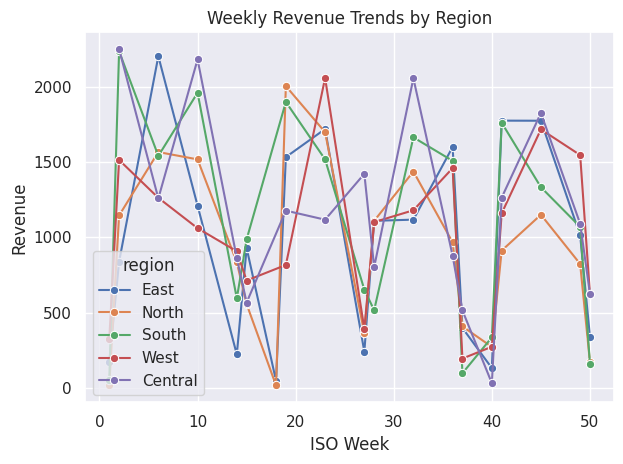

In [ ]:
#Visualisations
#Chart 1 — Line plot: Weekly revenue trends by region
plt.figure()

sns.lineplot(
    data=weekly_revenue_region,
    x="order_week",
    y="revenue",
    hue="region",
    marker="o"
)

plt.title("Weekly Revenue Trends by Region")
plt.xlabel("ISO Week")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


# New section

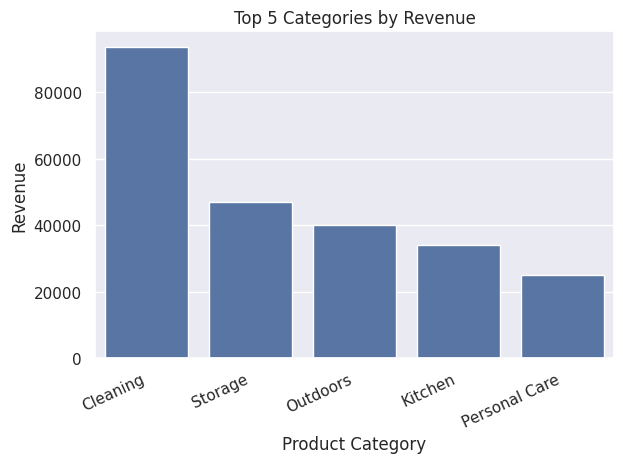

In [ ]:
#Chart 2 — Bar chart: Top 5 categories by revenue
top5 = category_performance.head(5).reset_index()

plt.figure()
sns.barplot(data=top5, x="category", y="revenue")

plt.title("Top 5 Categories by Revenue")
plt.xlabel("Product Category")
plt.ylabel("Revenue")
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()


# New section

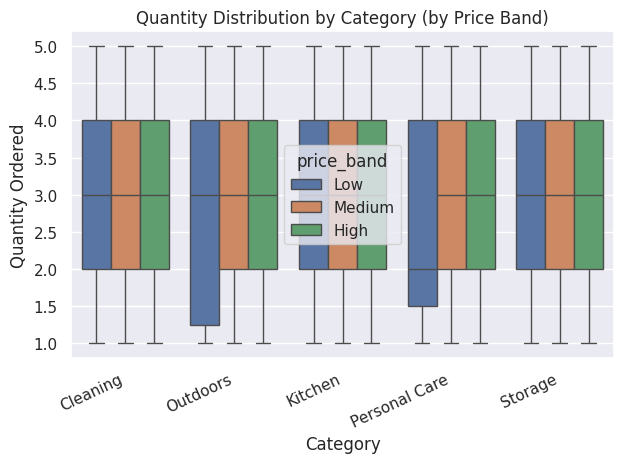

In [ ]:
#Chart 3 — Boxplot: Quantity vs category (split by price band)
plt.figure()

sns.boxplot(
    data=df,
    x="category",
    y="quantity",
    hue="price_band"
)

plt.title("Quantity Distribution by Category (by Price Band)")
plt.xlabel("Category")
plt.ylabel("Quantity Ordered")
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()


# New section

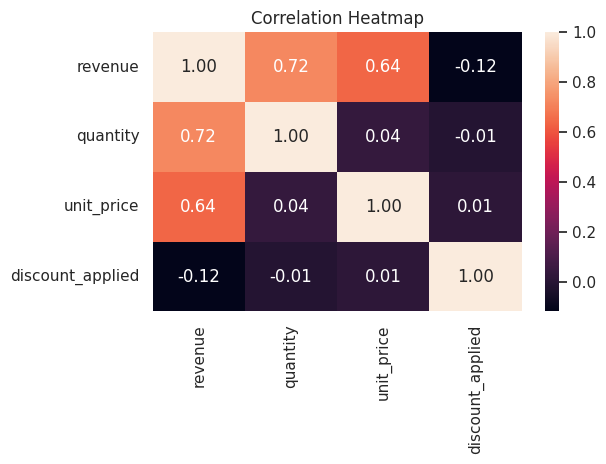

In [ ]:
#Heatmap: Correlation between numeric variables
corr_cols = ["revenue", "quantity", "unit_price", "discount_applied"]
corr = df[corr_cols].corr()

plt.figure()
sns.heatmap(corr, annot=True, fmt=".2f")

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


# New section

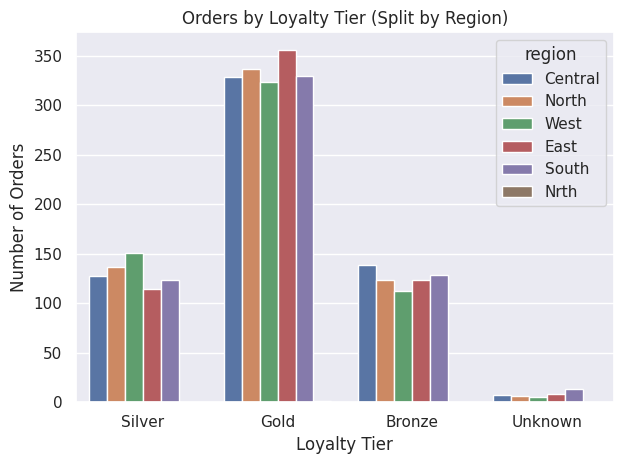

In [ ]:
#Chart 5 — Countplot: Orders by loyalty tier and region
plt.figure()

sns.countplot(
    data=df,
    x="loyalty_tier",
    hue="region"
)

plt.title("Orders by Loyalty Tier (Split by Region)")
plt.xlabel("Loyalty Tier")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


# New section

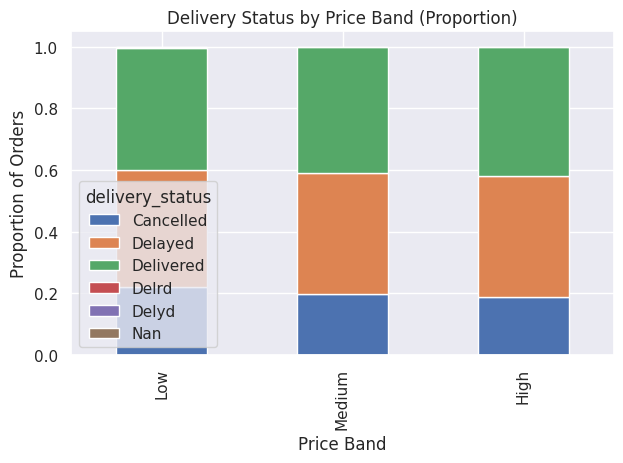

In [ ]:
#Chart 6 — Stacked bar: Delivery status by price band
ct = pd.crosstab(
    df["price_band"],
    df["delivery_status"],
    normalize="index"
)

ct.plot(kind="bar", stacked=True)

plt.title("Delivery Status by Price Band (Proportion)")
plt.xlabel("Price Band")
plt.ylabel("Proportion of Orders")
plt.tight_layout()
plt.show()
